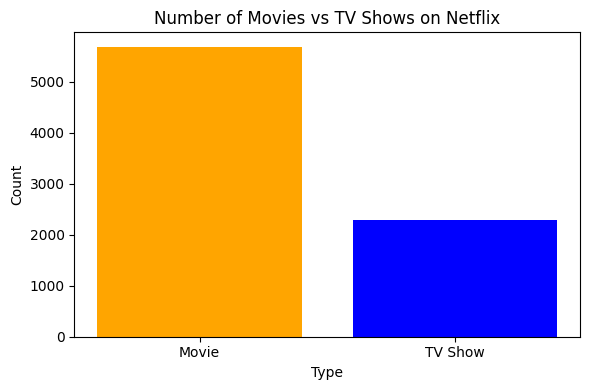

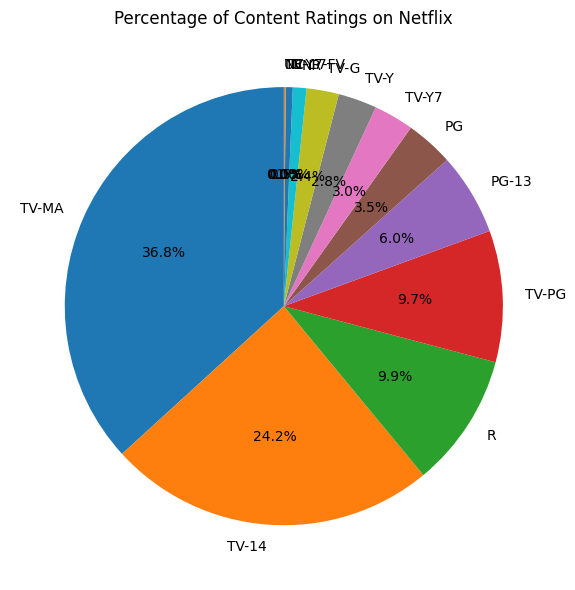

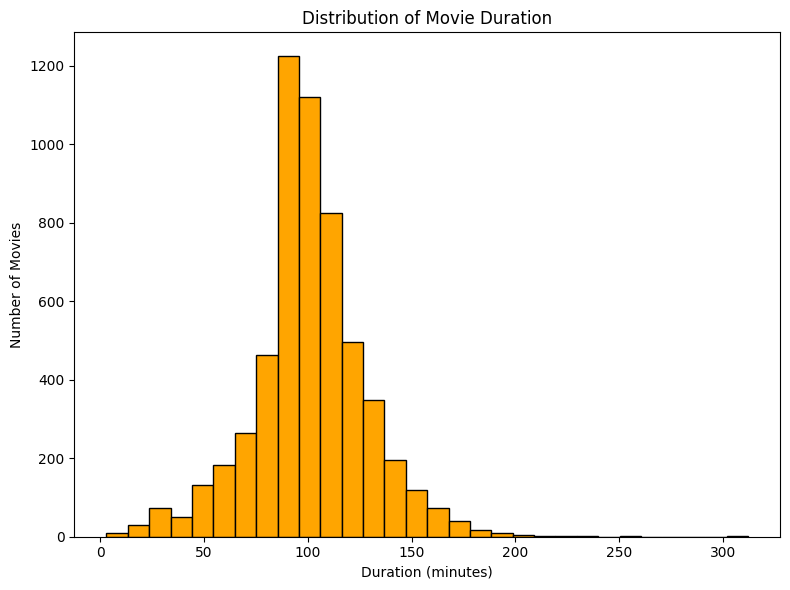

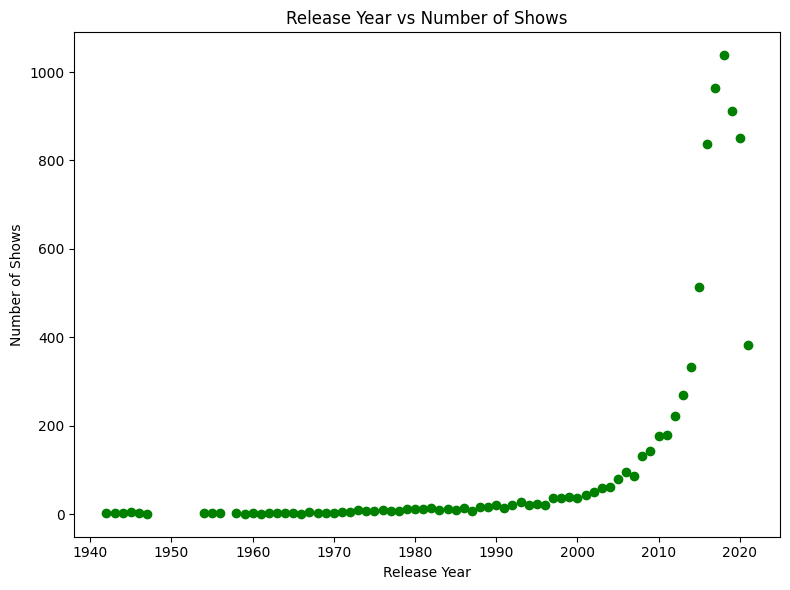

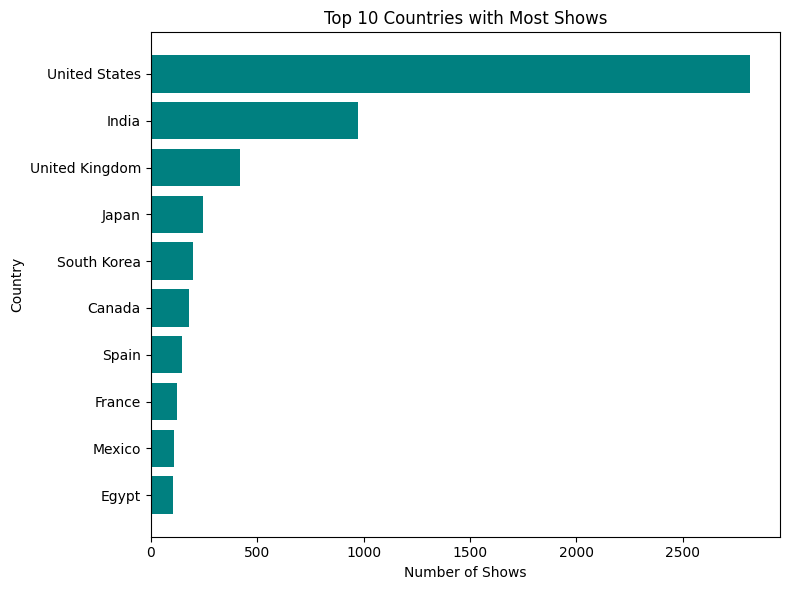

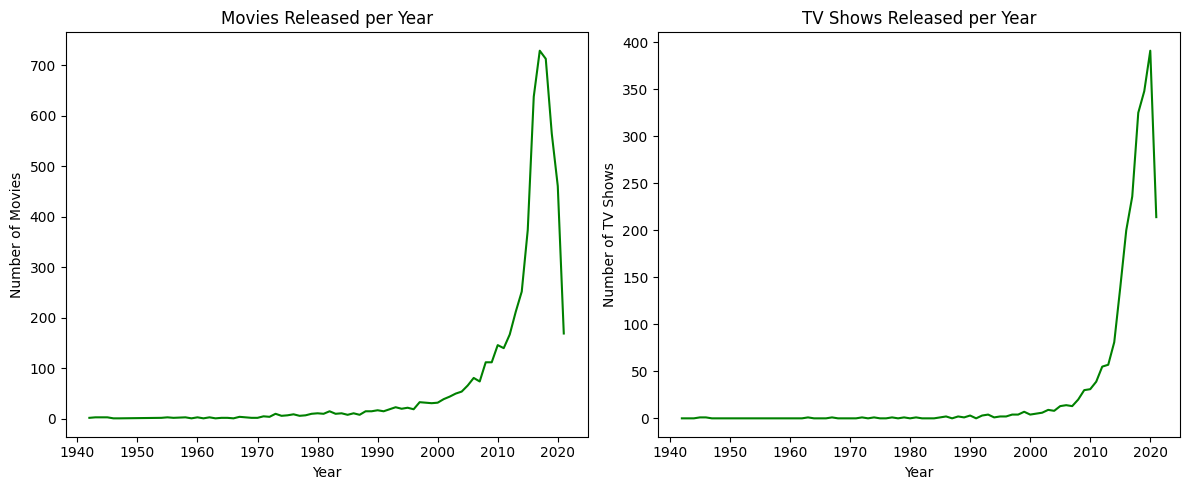

In [24]:
# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Read the Dataset
df = pd.read_csv("netflix_titles.csv")

# Step 3: Clean Data
df.dropna(subset=["type", "country", "release_year", "rating", "duration"], inplace=True)

# 1️⃣ Bar Chart - Number of Movies vs TV Shows
type_count = df["type"].value_counts()
plt.figure(figsize=(6, 4))
plt.bar(type_count.index, type_count.values, color=['orange', 'blue'])
plt.title("Number of Movies vs TV Shows on Netflix")
plt.xlabel("Type")
plt.ylabel("Count")
plt.tight_layout()

# 2️⃣ Pie Chart - Percentage of Content Ratings
rating_counts = df["rating"].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(rating_counts.values, labels=rating_counts.index, autopct="%1.1f%%", startangle=90)
plt.title("Percentage of Content Ratings on Netflix")
plt.tight_layout()

# 3️⃣ Histogram - Distribution of Movie Durations
movies_df = df[df['type'] == 'Movie'].copy()
movies_df['duration_int'] = movies_df['duration'].str.replace(' min', '').astype(int)
plt.figure(figsize=(8, 6))
plt.hist(movies_df['duration_int'], bins=30, color='orange', edgecolor='black')
plt.title("Distribution of Movie Duration")
plt.xlabel("Duration (minutes)")
plt.ylabel("Number of Movies")
plt.tight_layout()

# 4️⃣ Scatter Plot - Release Year vs Number of Shows
release_date = df['release_year'].value_counts().sort_index()
plt.figure(figsize=(8, 6))
plt.scatter(release_date.index, release_date.values, color='green')
plt.title("Release Year vs Number of Shows")
plt.xlabel("Release Year")
plt.ylabel("Number of Shows")
plt.tight_layout()

# 5️⃣ Horizontal Bar Chart - Top 10 Countries with Most Shows
country_counts = df['country'].value_counts().head(10).sort_values(ascending=True)
plt.figure(figsize=(8, 6))
plt.barh(country_counts.index, country_counts.values, color='teal')
plt.title("Top 10 Countries with Most Shows")
plt.xlabel("Number of Shows")
plt.ylabel("Country")
plt.tight_layout()

# 6️⃣ Line Plots (Subplots) - Movies & TV Shows Released per Year
content_by_year = df.groupby(['release_year', 'type']).size().unstack().fillna(0)
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Movies
ax[0].plot(content_by_year.index, content_by_year['Movie'], color='green')
ax[0].set_title("Movies Released per Year")
ax[0].set_xlabel("Year")
ax[0].set_ylabel("Number of Movies")

# TV Shows
ax[1].plot(content_by_year.index, content_by_year['TV Show'], color='green')
ax[1].set_title("TV Shows Released per Year")
ax[1].set_xlabel("Year")
ax[1].set_ylabel("Number of TV Shows")

plt.tight_layout()
plt.show()
